1. Install and Import Dependencies

In [ ]:
!pip3 install torch torchvision

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/nifiseoguntoye/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-31 Python-3.11.1 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

3. Make Detections

In [13]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
results = model(img)
results.print()

<function matplotlib.pyplot.show(close=None, block=None)>

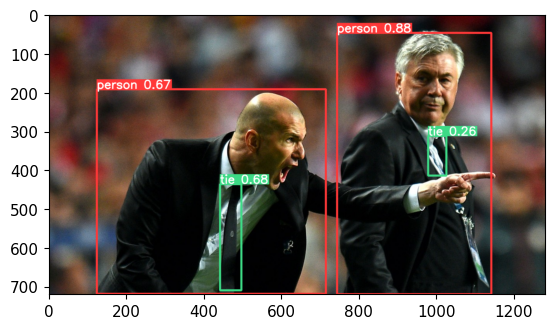

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

4. Real Time Detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # make detections
    results = model(frame)

    cv2.imshow('Drowsiness Detection', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

5. Train from scratch

In [2]:
import uuid
import os
import time

In [5]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 3

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

In [ ]:
!git clone https://github.com/heartexlabs/labelImg

In [ ]:

!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

6. Loading Custom Models

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [4]:
img = os.path.join('data', 'images', 'awake.1e6aced6-d0c6-11ed-9301-82aac0cd965a.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 26.8ms pre-process, 79.8ms inference, 8.2ms NMS per image at shape (1, 3, 384, 640)


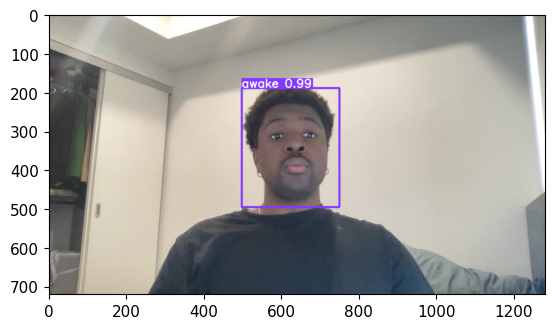

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
img2 = os.path.join('data', 'images', 'drowsy.3dc5ad00-d0c6-11ed-9301-82aac0cd965a.jpg')

In [ ]:
results2 = model(img2)
print(results2)

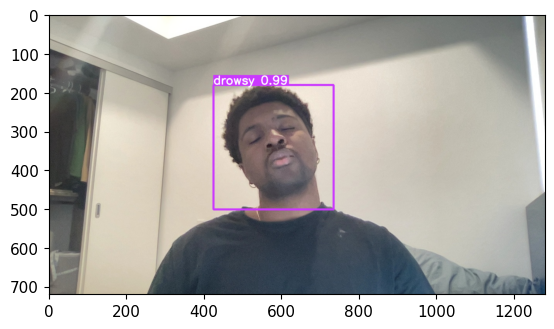

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()